# 모듈

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # 데이터 셋 분류
from sklearn.preprocessing import StandardScaler      # 사이킷런 전처리 사용
from sklearn.neighbors import KNeighborsClassifier    # K-NN 사용
from sklearn.linear_model import LogisticRegression, SGDClassifier   # 로지스틱 회귀 사용, 확률적 경사 하강법 사용
from scipy.special import softmax                     # softmax 사용


# KNN을 사용하여 예측 분류해보기

In [7]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish.iloc[:,1:].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

proba = kn.predict_proba(test_scaled[:5])

print('예측 값: ',kn.predict(test_scaled[:5]))
print('확률 순서: ',kn.classes_)
print('확률: ',np.round(proba,decimals=4))

예측 값:  ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
확률 순서:  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
확률:  [[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


# 시그모이드 함수 구현

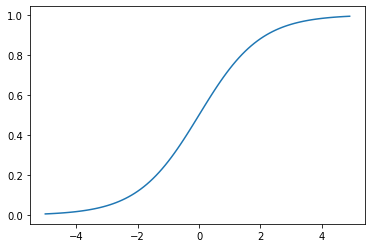

In [8]:
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z,phi)
plt.show()

# 다중분류에서 로지스틱 회귀와 소프트 맥스 비교해보기

In [9]:
#------------------------ 로지스틱 회귀 모듈 사용----------------------------------
lr = LogisticRegression(C=20, max_iter=1000)     # 규제 20으로 완화, 1000번 반복
lr.fit(train_scaled,train_target)                # 학습   

print(lr.score(train_scaled,train_target))       # 모델 평가
print(lr.score(test_scaled,test_target),'\n')

proba = lr.predict_proba(test_scaled[:5])        # 예측 확률 확인

print(lr.classes_)                               # 클래스 확인
print(np.round(proba,decimals=3),'\n')
#------------------------ 로지스틱 회귀 모듈 사용----------------------------------


#------------------------ 소프트 맥스 모듈 사용----------------------------------
decision = lr.decision_function(test_scaled[:5]) # 선형 방정식 반환(즉, z확인)
proba = softmax(decision,axis=1)                 # 소프트 맥스 사용해보기, axis=1은 각 행에 대해 계산
print(np.round(proba,decimals=3))               
#------------------------ 소프트 맥스 모듈 사용----------------------------------

0.9327731092436975
0.925 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]] 

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 확률적 경사 하강법 사용

In [24]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish.iloc[:,1:].to_numpy()
fish_target = fish['Species'].to_numpy()

# 데이터 셋 나누기
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 전처리
ss = StandardScaler() 
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 확률적 경사 하강법
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target),'\n')

# 추가 학습

sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.773109243697479
0.775 

0.8151260504201681
0.85


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


# 확률적 경사 하강법의 최적의 반복 횟수 찾기

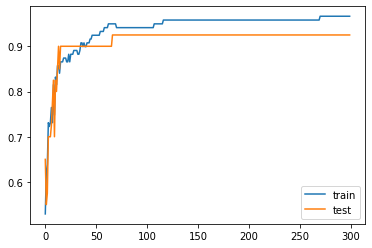

In [30]:
# 최적의 반복 횟수 찾기

sc = SGDClassifier(loss='log',random_state=42)

train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))


plt.plot(train_score,label='train')
plt.plot(test_score,label='test')
plt.legend()
plt.show()

# 적절한 반복 횟수로 학습 시키기

In [31]:
# 적절한 반복 횟수는 100

sc = SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.957983193277311
0.925
